## Comparing IMU to Autobender/Rotary Encoder

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from config import path_to_repository
from analysis import DLC3DBendAngles
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Rotary Encoder and IMU data from autobender trial slow.

renc = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_02_22/data_rotenc_2025_08_15_18_02_22.csv")
imu = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_02_22/data_imu_2025_08_15_18_02_22.csv")

# Rotary Encoder and IMU data from autobender trial fast.

renc2 = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_10_30/data_rotenc_2025_08_15_18_10_30.csv")
imu2 = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_10_30/data_imu_2025_08_15_18_10_30.csv")

cam = os.path.join(path_to_repository , "CSV Data/8_13_25/2025_08_13_10_55_23/8.13_DLC_3D.csv")

##########################

# Rotary Encoder and IMU Data from IMU calibration on Autobender from Tom test 9/9/25

imu3 = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_11_48_41_C/data_imu_2025_09_09_11_48_41.csv")
renc3 = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_11_48_41_C/data_rotenc_2025_09_09_11_48_41.csv")
cam3 = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_11_48_41_C/data_trigger_time_2025_09_09_11_48_41.csv")





In [7]:
#load DLC 3d coordinates from DLC triangulation
g = DLC3DBendAngles(cam)
h = DLC3DBendAngles(cam)
k = DLC3DBendAngles(cam3)


In [8]:
# Calculating bend angle form IMU's
# This method uses the bender_class methods.  These methods also used in BallBearing Class methods (inherited).  

def drop_rows_with_none_in_euler(df, euler_cols=("euler1", "euler2")):
    import numpy as np
    import pandas as pd
    df = df.copy()
    for c in euler_cols:
        if c not in df.columns:
            raise KeyError(f"Missing expected IMU column: {c}")
        # Normalize various string Nones to NaN
        df[c] = df[c].replace(["None", "none", "NULL", "null", ""], np.nan)
    mask_valid = df[list(euler_cols)].notna().all(axis=1)
    return df.loc[mask_valid].copy()

# ---------- g session ----------
g.load_imu_p_enc(imu, renc)
g.imu_df = drop_rows_with_none_in_euler(g.imu_df, euler_cols=("euler1", "euler2"))

# Quat → Euler
g.imu_quat_to_euler(imu_cols=('euler1','euler2'), out_prefix=('imu1','imu2'))

# Euler → world vectors (IMU1 pitch axis = y, IMU2 roll axis = x)
g.euler_to_unit_vec(prefix='imu1', axis='y', out_col='imu1_yvec')
g.euler_to_unit_vec(prefix='imu2', axis='y', out_col='imu2_yvec')

# Angle between chosen axes
g.angle_between_vectors('imu1_yvec', 'imu2_yvec', out_col='imu_joint_deg_rx_py')

# Store
g.add_imu_angle_column(g.imu_df['imu_joint_deg_rx_py'].to_numpy())


# ---------- h session ----------
h.load_imu_p_enc(imu2, renc2)
h.imu_df = drop_rows_with_none_in_euler(h.imu_df, euler_cols=("euler1", "euler2"))

h.imu_quat_to_euler(imu_cols=('euler1','euler2'), out_prefix=('imu1','imu2'))
h.euler_to_unit_vec(prefix='imu1', axis='y', out_col='imu1_yvec')
h.euler_to_unit_vec(prefix='imu2', axis='y', out_col='imu2_yvec')
h.angle_between_vectors('imu1_yvec', 'imu2_yvec', out_col='imu_joint_deg_rx_py')
h.add_imu_angle_column(h.imu_df['imu_joint_deg_rx_py'].to_numpy())


# ---------- k session ----------
k.load_imu_p_enc(imu3, renc3)
k.imu_df = drop_rows_with_none_in_euler(k.imu_df, euler_cols=("euler1", "euler2"))

k.imu_quat_to_euler(imu_cols=('euler1','euler2'), out_prefix=('imu1','imu2'))
k.euler_to_unit_vec(prefix='imu1', axis='y', out_col='imu1_yvec')
k.euler_to_unit_vec(prefix='imu2', axis='y', out_col='imu2_yvec')
k.angle_between_vectors('imu1_yvec', 'imu2_yvec', out_col='imu_joint_deg_rx_py')
k.add_imu_angle_column(k.imu_df['imu_joint_deg_rx_py'].to_numpy())


,timestamp,euler1,euler2,imu1_roll,imu1_pitch,imu1_yaw,imu2_roll,imu2_pitch,imu2_yaw,imu1_yvec,imu2_yvec,imu_joint_deg_rx_py,metric_imu_joint_deg_deg
0,114843655381,"(0.7303466796875, -0.044921875, 0.689880371093...","(0.0, 0.0, 0.0, 0.0)",-49.798657,85.127083,-46.175327,NaN,NaN,NaN,"(-0.06128528933721169, 0.9960093804342044, -0....","(nan, nan, nan)",NaN,NaN
1,114843668708,"(0.7225341796875, -0.044921875, 0.689880371093...","(0.0, 0.0, 0.0, 0.0)",-55.842713,85.494861,-52.204301,NaN,NaN,NaN,"(-0.061892710693633786, 0.9959640773326406, -0...","(nan, nan, nan)",NaN,NaN
2,114843675939,"(0.7225341796875, -0.044921875, 0.689880371093...","(0.0, 0.0, 0.0, 0.0)",-55.842713,85.494861,-52.204301,NaN,NaN,NaN,"(-0.061892710693633786, 0.9959640773326406, -0...","(nan, nan, nan)",NaN,NaN
3,114843685334,"(0.7303466796875, -0.044921875, 0.689880371093...","(0.0, 0.0, 0.0, 0.0)",-49.834881,85.123425,-46.216470,NaN,NaN,NaN,"(-0.06119713680178385, 0.996009373082005, -0.0...","(nan, nan, nan)",NaN,NaN
4,114843694832,"(0.7303466796875, -0.044921875, 0.689880371093...","(1.0078125, 0.0, 0.0, 0.0)",-49.834881,85.123425,-46.216470,0.000000,-0.000000,0.000000,"(-0.06119713680178385, 0.996009373082005, -0.0...","(0.0, 1.0, 0.0)",5.120386,5.120386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,114853629566,"(0.71826171875, -0.0496826171875, 0.6940307617...","(0.898193359375, -0.4393310546875, 0.016967773...",-67.190044,85.300826,-63.402904,-52.142227,1.740448,-0.867172,"(-0.06466267135722086, 0.9950456632106672, -0....","(-0.014688904879668313, 0.6139961077470062, -0...",47.817045,47.817045
1559,114853634788,"(0.71826171875, -0.0496826171875, 0.6939697265...","(0.898193359375, -0.4393310546875, 0.016967773...",-67.112555,85.303050,-63.320305,-52.142227,1.740448,-0.867172,"(-0.06474978894124557, 0.9950459644198171, -0....","(-0.014688904879668313, 0.6139961077470062, -0...",47.821731,47.821731
1560,114853638665,"(0.71826171875, -0.0496826171875, 0.6939697265...","(0.8992919921875, -0.43701171875, 0.0171508789...",-67.112555,85.303050,-63.320305,-51.848500,1.755469,-0.884489,"(-0.06474978894124557, 0.9950459644198171, -0....","(-0.01455116938722817, 0.6180412211234503, -0....",47.528978,47.528978
1561,114853644577,"(0.71826171875, -0.0496826171875, 0.6939697265...","(0.8992919921875, -0.43701171875, 0.0171508789...",-67.112555,85.303050,-63.320305,-51.848500,1.755469,-0.884489,"(-0.06474978894124557, 0.9950459644198171, -0....","(-0.01455116938722817, 0.6180412211234503, -0....",47.528978,47.528978


Text(0.5, 1.0, 'Session 3')

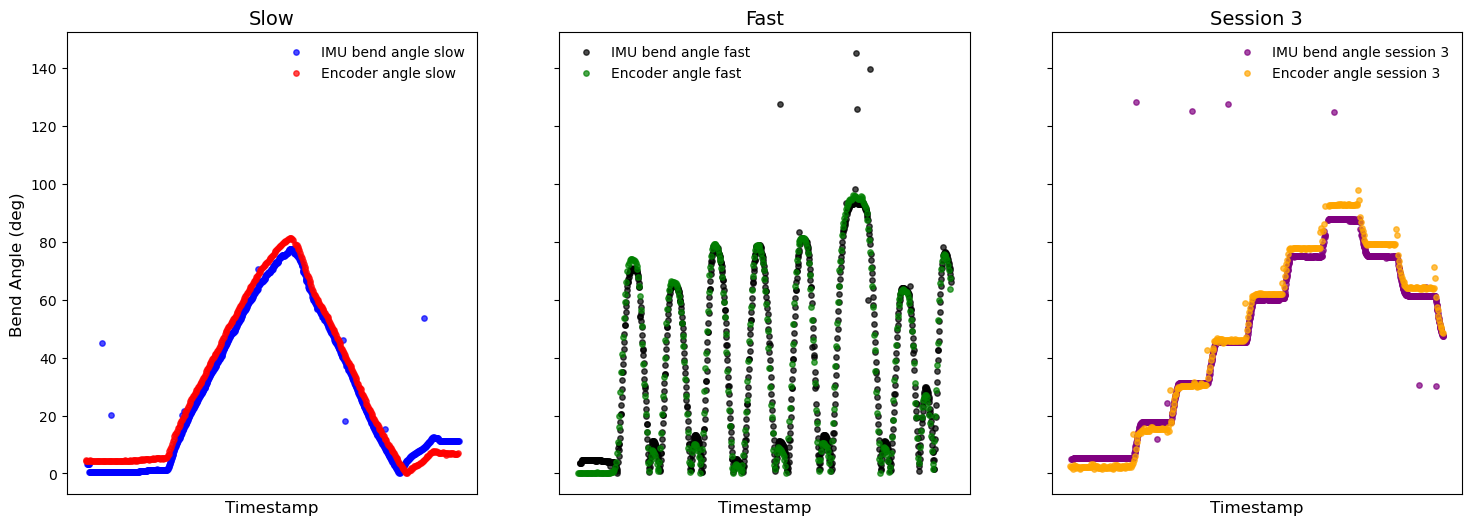

In [9]:
# Three side-by-side plots: g (Slow), h (Fast), k (Session 3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# --- Left subplot: Slow (g) ---
ax1.scatter(
    g.imu_df["timestamp"],
    g.imu_df["metric_imu_joint_deg_deg"],
    s=15, alpha=0.7, color="blue",
    label="IMU bend angle slow"
)
ax1.scatter(
    g.enc_df["timestamp"],
    g.enc_df["angle"].abs(),
    s=15, alpha=0.7, color="red",
    label="Encoder angle slow"
)
ax1.set_xlabel("Timestamp", fontsize=12)
ax1.set_ylabel("Bend Angle (deg)", fontsize=12)
ax1.set_xticks([])   # hide x tick labels
ax1.legend(frameon=False, loc="best")
ax1.set_title("Slow", fontsize=14)

# --- Middle subplot: Fast (h) ---
ax2.scatter(
    h.imu_df["timestamp"],
    h.imu_df["metric_imu_joint_deg_deg"],
    s=15, alpha=0.7, color="black",
    label="IMU bend angle fast"
)
ax2.scatter(
    h.enc_df["timestamp"],
    h.enc_df["angle"].abs(),
    s=15, alpha=0.7, color="green",
    label="Encoder angle fast"
)
ax2.set_xlabel("Timestamp", fontsize=12)
ax2.set_xticks([])
ax2.legend(frameon=False, loc="best")
ax2.set_title("Fast", fontsize=14)

# --- Right subplot: Session 3 (k) ---
ax3.scatter(
    k.imu_df["timestamp"],
    k.imu_df["imu_joint_deg_rx_py"],  # <-- use the rx_py column
    s=15, alpha=0.7, color="purple",
    label="IMU bend angle session 3"
)
ax3.scatter(
    k.enc_df["timestamp"],
    k.enc_df["angle"].abs(),
    s=15, alpha=0.7, color="orange",
    label="Encoder angle session 3"
)
ax3.set_xlabel("Timestamp", fontsize=12)
ax3.set_xticks([])
ax3.legend(frameon=False, loc="best")
ax3.set_title("Session 3", fontsize=14)



In [10]:
# timestamp matching IMU data to rotary encoder data

for obj in (g, h, k):
    if "imu_joint_deg_rx_py" in obj.imu_df.columns and "imu_joint_deg" not in obj.imu_df.columns:
        obj.imu_df["imu_joint_deg"] = obj.imu_df["imu_joint_deg_rx_py"]

# Attach IMU columns onto ENCODER rows (encoder is left table)
g.match_encoder_to_imu(
    enc_time_col="timestamp",      # encoder time column
    imu_time_col="timestamp",      # IMU time column
    tolerance="200ms",             # try 200ms → tighten/loosen as needed
    direction="nearest",
    columns=["imu_joint_deg", "timestamp"],  # or None for all IMU cols
    suffix="_imu",
    keep_time_delta=True,
    drop_unmatched=True,
)

# Attach IMU columns onto ENCODER rows (encoder is left table)
h.match_encoder_to_imu(
    enc_time_col="timestamp",      # encoder time column
    imu_time_col="timestamp",      # IMU time column
    tolerance="200ms",             # try 200ms → tighten/loosen as needed
    direction="nearest",
    columns=["imu_joint_deg", "timestamp"],  # or None for all IMU cols
    suffix="_imu",
    keep_time_delta=True,
    drop_unmatched=True,
)

# Pick the angle column that exists in k.imu_df
k_angle_col = "imu_joint_deg" if "imu_joint_deg" in k.imu_df.columns else "imu_joint_deg_rx_py"

# Attach IMU columns onto ENCODER rows (encoder is left table)
k.match_encoder_to_imu(
    enc_time_col="timestamp",      # encoder time column
    imu_time_col="timestamp",      # IMU time column
    tolerance="200ms",             # try 200ms → tighten/loosen as needed
    direction="nearest",
    columns=[k_angle_col, "timestamp"],  # match what exists in k.imu_df
    suffix="_imu",
    keep_time_delta=True,
    drop_unmatched=True,
)



C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\camera_sensor_imu_analysis\analysis.py:1606: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\camera_sensor_imu_analysis\analysis.py:1607: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\camera_sensor_imu_analysis\analysis.py:1606: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8"

,timestamp,raw,volts,angle,imu_joint_deg_imu,timestamp_imu,time_delta_imu
0,114843666324,14243,2.670562,-2.455342,NaN,114843668708,2.384
1,114843691796,14272,2.676000,-2.120549,5.120386,114843694832,3.036
2,114843718710,14277,2.676938,-2.062826,5.149383,114843719624,0.914
3,114843740703,14319,2.684813,-1.577953,5.149383,114843739476,-1.227
4,114843764704,14211,2.664563,-2.824769,5.287750,114843760381,-4.323
...,...,...,...,...,...,...,...
455,114853560224,9983,1.871813,-51.635318,50.882399,114853557926,-2.298
456,114853581045,10074,1.888875,-50.584760,49.789261,114853580490,-0.555
457,114853602148,10098,1.893375,-50.307690,48.881876,114853602721,0.573
458,114853621905,10220,1.916250,-48.899249,48.134818,114853620069,-1.836


In [11]:
# determining median angular velocity of rotary encoder -> use this value for error bar plot label

# g (slow)
_, stats_g = g.add_encoder_angular_velocity(
    angle_col="angle",
    time_col="timestamp",
    out_col="enc_angvel_dps",
    time_format="HMSfn",   # HHMMSSffffff
    unwrap=False,
    smoothing=None
)
median_speed_slow = stats_g["median_speed_dps"]
print(f"[g / slow]  Median speed: {median_speed_slow:.3f} deg/s")

# h (fast)
_, stats_h = h.add_encoder_angular_velocity(
    angle_col="angle",
    time_col="timestamp",
    out_col="enc_angvel_dps",
    time_format="HMSfn",
    unwrap=False,
    smoothing=None
)
median_speed_fast = stats_h["median_speed_dps"]
print(f"[h / fast]  Median speed: {median_speed_fast:.3f} deg/s")

# k (session 3)
_, stats_k = k.add_encoder_angular_velocity(
    angle_col="angle",
    time_col="timestamp",
    out_col="enc_angvel_dps",
    time_format="HMSfn",
    unwrap=False,
    smoothing=None
)
median_speed_k = stats_k["median_speed_dps"]
print(f"[k / sess3] Median speed: {median_speed_k:.3f} deg/s")

# Optional: quick comparison summary
print("\nSpeed summary (median |deg/s|):")
print(f"  g / slow : {median_speed_slow:.3f}")
print(f"  h / fast : {median_speed_fast:.3f}")
print(f"  k / sess3: {median_speed_k:.3f}")


AttributeError: 'DLC3DBendAngles' object has no attribute 'add_encoder_angular_velocity'

In [ ]:

# plotting error bars

# --- pick labels for the boxplot (you already computed these) ---
runs = [
    ("g", g, f"{median_speed_slow:.3f} deg/s"),
    ("h", h, f"{median_speed_fast:.3f} deg/s"),
    ("k", k, f"{median_speed_k:.3f} deg/s"),
]

enc_angle_col = "angle"              # encoder angle column
imu_candidates = [                   # try these (in order) as the IMU-on-encoder matched column
    "imu_joint_deg_imu",
    "imu_joint_deg_rx_py_imu",
    ("metric", "imu_joint_deg", "deg_imu"),  # if you accidentally carried a MultiIndex-style name over
]

def find_imu_col(df):
    """Return a usable IMU column name present in df, or None."""
    cols = df.columns
    for c in imu_candidates:
        # allow tuple (MultiIndex-like stored as strings) -> join if needed
        if isinstance(c, tuple):
            c_joined = "_".join(map(str, c))
            if c_joined in cols:
                return c_joined
        if c in cols:
            return c
    return None

def coerce_1d_numeric(series_like):
    """
    Turn a wide variety of column payloads (Series, 1xN DataFrame, list/array of scalars or 1-element lists)
    into a clean 1-D float NumPy array.
    """
    # If it's a DataFrame (e.g., accidental 2-D), squeeze to a Series
    if isinstance(series_like, pd.DataFrame):
        if series_like.shape[1] == 1:
            series_like = series_like.iloc[:, 0]
        else:
            # More than 1 column: take the first as a fallback
            series_like = series_like.iloc[:, 0]

    # Now attempt to convert elementwise; handle list/tuple elements like [val] or (val,)
    if isinstance(series_like, pd.Series):
        if series_like.dtype == object:
            series_like = series_like.apply(
                lambda v: (np.asarray(v).squeeze()[0] if (isinstance(v, (list, tuple, np.ndarray)) and np.asarray(v).size == 1)
                           else (np.asarray(v).squeeze() if not np.isscalar(v) else v))
            )
        return pd.to_numeric(series_like, errors="coerce").to_numpy(dtype=float)

    arr = np.asarray(series_like, dtype=object)
    # If elements are arrays/lists, squeeze each
    if arr.ndim > 1:
        arr = np.squeeze(arr)
        if arr.ndim > 1:
            arr = arr[:, 0]  # last-ditch: first column
    # Map non-scalars to scalars
    out = []
    for v in arr:
        if np.isscalar(v):
            out.append(v)
        else:
            vv = np.asarray(v)
            vv = np.squeeze(vv)
            out.append(vv.item() if vv.size == 1 else np.nan)
    return pd.to_numeric(pd.Series(out), errors="coerce").to_numpy(dtype=float)

# --- compute |abs(encoder)| vs IMU error per run, robustly ---
errors_per_run, labels, metrics_list = [], [], []

for tag, obj, speed_label in runs:
    df = obj.enc_df.copy()

    # Find IMU column name that actually exists in this enc_df
    imu_col = find_imu_col(df)
    if imu_col is None:
        print(f"[{tag}] No IMU column found in enc_df. Skipping.")
        continue

    # Coerce both series to clean 1-D float arrays
    enc = coerce_1d_numeric(df[enc_angle_col])
    imu = coerce_1d_numeric(df[imu_col])

    # Drop NaNs and align
    m = np.isfinite(enc) & np.isfinite(imu)
    enc, imu = enc[m], imu[m]
    if enc.size == 0:
        print(f"[{tag}] No finite matched samples after cleaning. Skipping.")
        continue

    # Force encoder positive, then absolute error
    aerr = np.abs(np.abs(enc) - imu)

    errors_per_run.append(aerr)
    labels.append(speed_label)

    metrics_list.append((
        speed_label,
        {
            "n": int(aerr.size),
            "mae_posenc": float(np.mean(aerr)),
            "max_abs_error_posenc": float(np.max(aerr)),
            "p95_abs_error_posenc": float(np.percentile(aerr, 95))
        }
    ))

# --- Plot: same color boxes + jittered points ---
box_color  = "#1f77b4"
box_alpha  = 0.5
data_alpha = 0.5
jitter     = 0.04

fig, ax = plt.subplots(figsize=(9, 5))
bp = ax.boxplot(
    errors_per_run,
    labels=labels,
    patch_artist=True,
    showfliers=False,
    widths=0.6,
)
for patch in bp["boxes"]:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor("black")
for med in bp["medians"]:
    med.set_color("black"); med.set_linewidth(1.5)
for w in bp["whiskers"]:
    w.set_color("black"); w.set_linewidth(1.25)
for cap in bp["caps"]:
    cap.set_color("black"); cap.set_linewidth(1.25)

# jittered points
for i, arr in enumerate(errors_per_run, start=1):
    x = np.random.normal(loc=i, scale=jitter, size=len(arr))
    ax.scatter(x, arr, s=12, alpha=data_alpha, color="black")

ax.set_xlabel("Median speed (deg/s)", fontsize=12)
ax.set_ylabel("Absolute Angular Error (deg)\n(using |encoder angle|)", fontsize=12)
ax.set_ylim(0, 15)
ax.set_title("IMU vs Encoder Error by Run", fontsize=13)
plt.tight_layout()
plt.savefig("imu_enc_box_multi.png", dpi=300, bbox_inches="tight")
plt.show()

# Quick text summary
for lbl, m in metrics_list:
    print(f"{lbl}: n={m['n']}, MAE={m['mae_posenc']:.3f}°, "
          f"p95={m['p95_abs_error_posenc']:.3f}°, max={m['max_abs_error_posenc']:.3f}°")
